Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


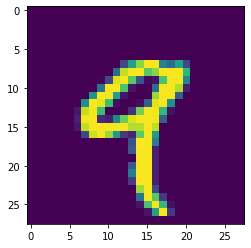

Print results for 50 test data points:
Predicted labels:  [2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1
 2 1 1 7 4 2 3 5 1 2 4 4]
Ground truth    :  [2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1
 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy of 1NN for MNIST: 96.91 %
Running time: 37.01 (s)


In [ ]:
#%reset
#Pick dataset
!pip install python-mnist
from mnist import MNIST

#google colab mount
from google.colab import drive
drive.mount('/content/drive')

#some library
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score

#mount data from drive, proceed training
mndata = MNIST('/content/drive/My Drive/Data/')
mndata.load_testing()
mndata.load_training()
X_test = mndata.test_images
X_train = mndata.train_images
y_test = np.asarray(mndata.test_labels)
y_train = np.asarray(mndata.train_labels)


f = open('/content/drive/My Drive/Data/train-images-idx3-ubyte','rb') #rb to open binary file
image_size = 28
num_images = 40

f.read(16)

buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

#Show image of extracted number
image = np.asarray(data[4]).squeeze()
plt.imshow(image)
plt.show()

start_time = time.time()
classifier = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
end_time = time.time()

print("Print results for 50 test data points:")
print("Predicted labels: ", y_pred[1:50])
print("Ground truth    : ", y_test[1:50])

print("Accuracy of 1NN for MNIST: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print("Running time: %.2f (s)" % (end_time - start_time))